**Analyze the difference between original audio and different codec generated audios**

#python -m pip install -U scikit-image

Mean Squared Error (MSE): 32.7303466796875
Structural Similarity Index (SSIM): 0.8200623854878651
Accuracy: 82.01%


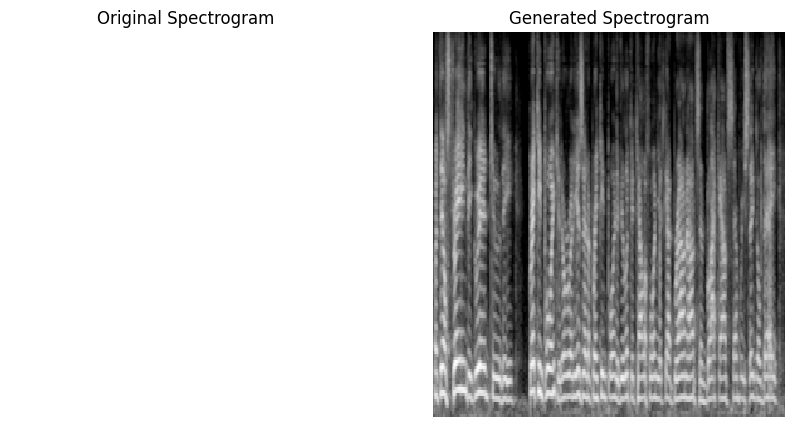

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import librosa
import librosa.display
from skimage.metrics import structural_similarity as ssim

def generate_spectrogram(wav_path):
    y, sr = librosa.load(wav_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

def compare_spectrograms(original_wav, generated_wav):
    # Generate spectrograms
    original = generate_spectrogram(original_wav)
    generated = generate_spectrogram(generated_wav)
    
    # Resize generated spectrogram to match original if dimensions are different
    if original.shape != generated.shape:
        generated = cv2.resize(generated, (original.shape[1], original.shape[0]))
    
    # Compute Mean Squared Error (MSE)
    mse = np.mean((original - generated) ** 2)
    
    # Compute Structural Similarity Index (SSIM)
    similarity = ssim(original, generated,data_range=original.max() - original.min())
    
    # Define accuracy based on similarity (SSIM range is -1 to 1, normalize it to 0-100%)
    accuracy = max(0, similarity) * 100
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Structural Similarity Index (SSIM): {similarity}")
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Display images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    librosa.display.specshow(original, sr=22050, cmap='gray')
    axs[0].set_title('Original Spectrogram')
    axs[0].axis('off')
    
    librosa.display.specshow(generated, sr=22050, cmap='gray')
    axs[1].set_title('Generated Spectrogram')
    axs[1].axis('off')
    
    plt.show()

# Example usage
compare_spectrograms('/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav', '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/audio_dec_codec/Donald_Trump_00018_audiodec_codec.wav')
